# Using XGBoost to predict Day Ahead prices (and comparisons with Linear Regression and Baseline)

In [1]:
import pandas as pd
from XGB import XGBModel

In [2]:
df_train = pd.read_csv("../ordered_train_set.csv", index_col=0)
df_validation = pd.read_csv("../ordered_seasonal_validation_set.csv", index_col=0)
df_test = pd.read_csv("../ordered_test_set.csv", index_col=0)

In [3]:
features = ['actual_load', 'hour',
       'month', 'day_of_week', 'holiday', 'business_hour', 'season', 'temp',
       'dwpt', 'avg_DA_price(h-24)', 'avg_load(h-24)',
       'RT_price(t-1D)', 'DA_price(t-1D)', 'load(t-1D)', 'RT_price(t-2D)',
       'DA_price(t-2D)', 'load(t-2D)', 'RT_price(t-3D)', 'DA_price(t-3D)',
       'load(t-3D)', 'RT_price(t-4D)', 'DA_price(t-4D)', 'load(t-4D)',
       'RT_price(t-5D)', 'DA_price(t-5D)', 'load(t-5D)', 'RT_price(t-6D)',
       'DA_price(t-6D)', 'load(t-6D)', 'RT_price(t-7D)', 'DA_price(t-7D)',
       'load(t-7D)', 'nat_gas_spot_price', 'monthly_avg_NY_natgas_price']

target = 'DA_price'

In [4]:
xgbmodel = XGBModel(df_train, df_validation, df_test, features, target)

In [5]:
xgbmodel.train()

[13:22:30] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:56.58786	validation_1-rmse:45.58367
[100]	validation_0-rmse:26.28004	validation_1-rmse:23.01760
[200]	validation_0-rmse:17.08766	validation_1-rmse:18.38465
[300]	validation_0-rmse:14.48207	validation_1-rmse:17.63989
[400]	validation_0-rmse:13.53040	validation_1-rmse:17.61368
[461]	validation_0-rmse:13.18789	validation_1-rmse:17.65416


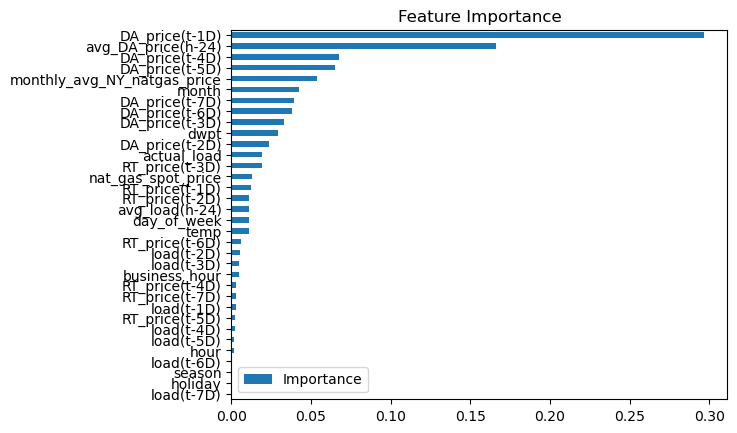

In [6]:
xgbmodel.feature_importance()

In [7]:
xgbmodel.predict(pred_on = 'validation')

Overriding pred_df with df_validation!


(                     time  DA_price  Baseline_predictions  XGBoost_predictions
 0     2022-09-01 00:00:00     69.16                101.36            89.743683
 1     2022-09-01 01:00:00     64.95                 85.61            78.503838
 2     2022-09-01 02:00:00     64.25                 80.40            75.630875
 3     2022-09-01 03:00:00     63.12                 77.43            73.767258
 4     2022-09-01 04:00:00     63.82                 77.49            73.767258
 ...                   ...       ...                   ...                  ...
 3134  2023-08-26 19:00:00     26.02                 36.70            35.004028
 3135  2023-08-26 20:00:00     26.18                 34.76            33.569012
 3136  2023-08-26 21:00:00     25.98                 31.10            30.826191
 3137  2023-08-26 22:00:00     25.87                 29.65            29.433445
 3138  2023-08-26 23:00:00     25.11                 28.00            27.327446
 
 [3139 rows x 4 columns],
 17.55101439

In [8]:
xgbmodel.predict(pred_on = 'test')

Overriding pred_df with df_test!


(                     time  DA_price  Baseline_predictions  XGBoost_predictions
 0     2022-08-30 00:00:00    107.90                 96.51            95.507324
 1     2022-08-30 01:00:00     90.86                 85.91            89.891068
 2     2022-08-30 02:00:00     84.54                 82.93            81.745865
 3     2022-08-30 03:00:00     84.80                 79.22            80.550568
 4     2022-08-30 04:00:00     88.75                 79.63            79.074242
 ...                   ...       ...                   ...                  ...
 5651  2023-08-31 19:00:00     32.92                 25.92            29.097446
 5652  2023-08-31 20:00:00     29.37                 28.44            28.180365
 5653  2023-08-31 21:00:00     26.53                 27.90            26.984922
 5654  2023-08-31 22:00:00     23.88                 25.30            25.678444
 5655  2023-08-31 23:00:00     22.97                 23.91            23.384279
 
 [5656 rows x 4 columns],
 21.50564960

In [9]:
xgbmodel.predict(pred_on = 'test', pred_date = '2022-08-30')

Overriding pred_df with df_test!
Overriding pred_df with date provided!


(                   time  DA_price  Baseline_predictions  XGBoost_predictions
 0   2022-08-30 00:00:00    107.90                 96.51            95.507324
 1   2022-08-30 01:00:00     90.86                 85.91            89.891068
 2   2022-08-30 02:00:00     84.54                 82.93            81.745865
 3   2022-08-30 03:00:00     84.80                 79.22            80.550568
 4   2022-08-30 04:00:00     88.75                 79.63            79.074242
 5   2022-08-30 05:00:00     89.58                 83.97            82.129562
 6   2022-08-30 06:00:00     99.14                 93.37            92.892365
 7   2022-08-30 07:00:00    110.65                 97.09            95.507324
 8   2022-08-30 08:00:00    122.52                112.04           103.531479
 9   2022-08-30 09:00:00    126.47                120.88           105.988342
 10  2022-08-30 10:00:00    131.90                128.15           121.941711
 11  2022-08-30 11:00:00    141.26                132.09        